# Week 2 – Two-view Reconstruction Deliverable

In [2]:
from pathlib import Path
import sys

PROJECT_ROOT = Path('.').resolve()
if not (PROJECT_ROOT / 'assets').exists():
    PROJECT_ROOT = Path('..').resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

ASSETS_DIR = PROJECT_ROOT / 'assets'


In [3]:
import importlib
import src.two_view_reconstruction as tvr
importlib.reload(tvr)
from src.two_view_reconstruction import run_two_view_reconstruction, pose_sanity_checks, essential_residuals

best = run_two_view_reconstruction(
    asset_dir=ASSETS_DIR,
    preferred_pair=("img_5.jpeg", "img_6.jpeg"),
    detector="SIFT",
    ratio_thresh=0.70,
    output_path=PROJECT_ROOT / "outputs" / "reconstruction" / "two_view_points.ply",
)

print("Using fixed pair: img_5.jpeg vs img_6.jpeg")
print(f"Matched {best.match_count} features; {best.inlier_count} E-matrix inliers.")
print(f"Cheirality-selected pose: {best.pose_label}")
print(f"Rotation R:\n{best.R}")
print(f"Translation t:\n{best.t.ravel()}")
print(f"Point cloud: {len(best.points_3d)} points saved to {best.ply_path}")


Using fixed pair: img_5.jpeg vs img_6.jpeg
Matched 449 features; 342 E-matrix inliers.
Cheirality-selected pose: R1,-t
Rotation R:
[[ 9.98217517e-01 -1.03597324e-03  5.96717376e-02]
 [ 2.55476258e-04  9.99914342e-01  1.30859877e-02]
 [-5.96801830e-02 -1.30474175e-02  9.98132276e-01]]
Translation t:
[-0.91279051 -0.00234229 -0.40842134]
Point cloud: 342 points saved to /Users/muhammadabdullahirfan/Desktop/Uni/Sem_5/CV/project/cv-project/outputs/reconstruction/two_view_points.ply


In [4]:
pose_metrics = pose_sanity_checks(best.R, best.t)
print(
    f"||R^T R - I||_F={pose_metrics['ortho_err']:.3e}  det(R)={pose_metrics['det']:.6f}  ||t||={pose_metrics['t_norm']:.6f}"
)

residuals = essential_residuals(best.E, best.pts_a_norm, best.pts_b_norm)
print(
    f"Epipolar residuals | mean={residuals['mean']:.4e}, median={residuals['median']:.4e}, max={residuals['max']:.4e}"
)
print(f"Cheirality: {len(best.points_3d)} / {best.inlier_count} points with positive depth")


||R^T R - I||_F=2.534e-16  det(R)=1.000000  ||t||=1.000000
Epipolar residuals | mean=3.7608e-04, median=2.5565e-04, max=1.4749e-03
Cheirality: 342 / 342 points with positive depth


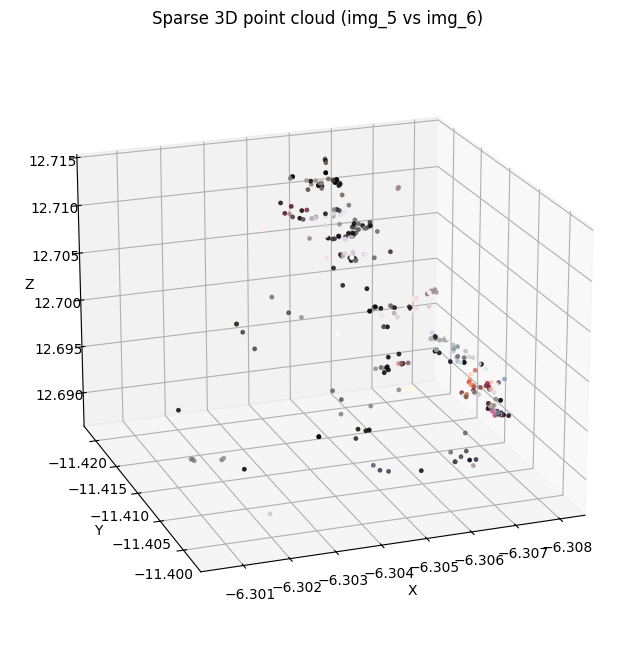

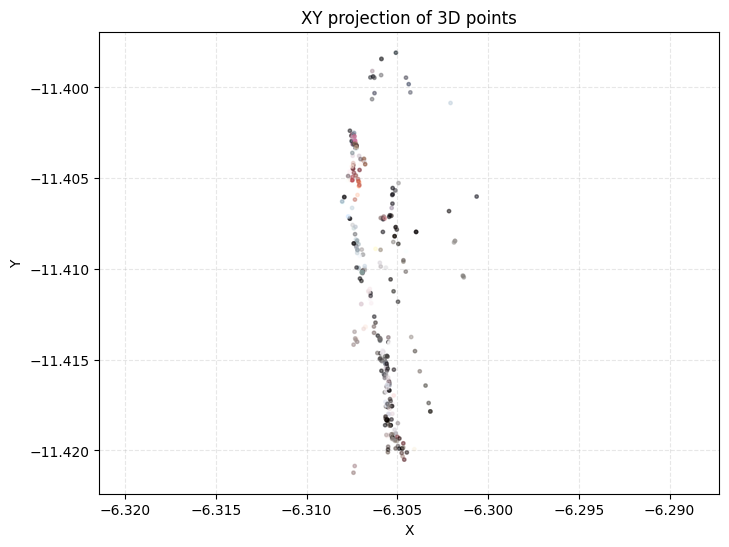

In [5]:
import matplotlib.pyplot as plt
import numpy as np

pts = best.points_3d
colors = best.colors_rgb / 255.0 if hasattr(best, 'colors_rgb') else None

# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
kwargs = {"s": 6, "alpha": 0.8}
if colors is not None:
    kwargs["c"] = colors
ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], **kwargs)
ax.set_title("Sparse 3D point cloud (img_5 vs img_6)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(elev=20, azim=70)
plt.show(block=False)

# 2D scatter (XY projection)
plt.figure(figsize=(8, 6))
plt.scatter(pts[:, 0], pts[:, 1], s=6, alpha=0.5, c=kwargs.get("c", "blue"))
plt.title("XY projection of 3D points")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show(block=False)
